In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
X=df.values

In [4]:
np.shape(X)

(11500, 180)

In [5]:

X=X[:,1:-1]


In [6]:
X

array([[135, 190, 229, ..., -116, -83, -51],
       [386, 382, 356, ..., 154, 143, 129],
       [-32, -39, -47, ..., -35, -35, -36],
       ...,
       [14, 6, -13, ..., -2, -1, -8],
       [-40, -25, -9, ..., 68, 59, 55],
       [29, 41, 57, ..., -2, 2, 20]], dtype=object)

In [13]:
#from sklearn.model_selection import train_test_split
y=np.array(df['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [15]:
np.shape(X_test)

(2300, 178)

In [28]:
X_train = X_train.reshape(-1,178,1)
X_test = X_test.reshape(-1,178,1)
X_train.shape
X_test.shape

(2300, 178, 1)

In [138]:
X_train

array([[-163, -155, -136, ..., -100, -99, -87],
       [-279, -271, -163, ..., -106, -89, -68],
       [51, 54, 42, ..., 81, 40, 8],
       ...,
       [70, 117, 78, ..., 16, 58, 88],
       [-1, 22, 42, ..., 2, -12, -9],
       [-22, -11, -10, ..., 28, 25, 18]], dtype=object)

In [139]:
Y_test

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

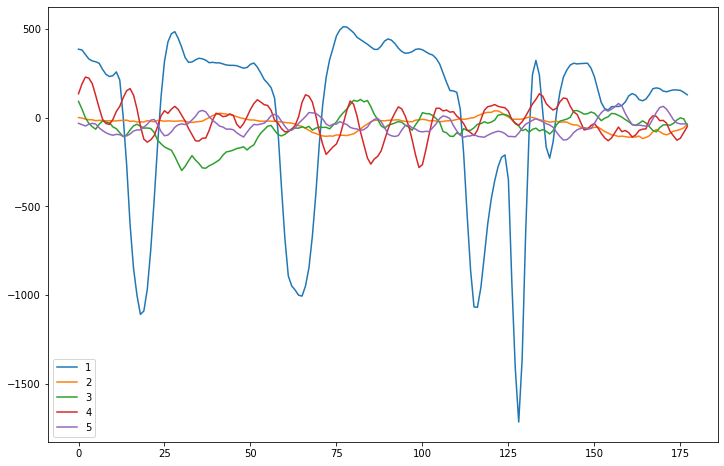

In [7]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

In [4]:
model = Sequential()
model.add(LSTM(56, input_shape=(45,1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 45, 56)            12992     
_________________________________________________________________
dropout (Dropout)            (None, 45, 56)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 56)                25312     
_________________________________________________________________
dropout_1 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                1140      
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#try X=np.asarray(X).astype(np.float32) and Y=np.asarray(Y).astype(np.float32) before passing X and Y to model

In [30]:
X=(X_train[:,::4]-X_train.mean())/X_train.std()
X=np.asarray(X).astype(np.float32)
Y=Y_train[:,1:]
Y=np.asarray(Y).astype(np.float32)

In [23]:
X_train

array([[-157, -127, -96, ..., -73, -104, -87],
       [-212, -23, 77, ..., -196, -163, -68],
       [52, 31, 23, ..., 189, 167, 8],
       ...,
       [43, 5, -135, ..., -17, 15, 88],
       [-27, 41, -19, ..., -26, 26, -9],
       [-30, -6, -12, ..., 17, 22, 18]], dtype=object)

In [32]:
np.shape(X)

(9200, 45, 1)

In [145]:
Y_train

array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [158]:
np.shape(Y)
Y

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [156]:
XT=(X_test[:,::4]-X_test.mean())/X_test.std()
XT=np.asarray(XT).astype(np.float32)
YT=Y_test[:,1:]
YT=np.asarray(YT).astype(np.float32)

In [53]:
BS=15
epochsn=15

In [57]:
model.fit(X, Y, batch_size = 15, epochs = 50,shuffle=False)


Epoch 1/50
614/614 [==============================] - 21s 34ms/step - loss: 0.2427 - accuracy: 0.6738
Epoch 2/50
614/614 [==============================] - 14s 23ms/step - loss: 0.2355 - accuracy: 0.6807
Epoch 3/50
614/614 [==============================] - 17s 28ms/step - loss: 0.2328 - accuracy: 0.6820
Epoch 4/50
614/614 [==============================] - 22s 36ms/step - loss: 0.2312 - accuracy: 0.6859
Epoch 5/50
614/614 [==============================] - 21s 34ms/step - loss: 0.2272 - accuracy: 0.6929
Epoch 6/50
614/614 [==============================] - 20s 33ms/step - loss: 0.2284 - accuracy: 0.6908
Epoch 7/50
614/614 [==============================] - 21s 34ms/step - loss: 0.2237 - accuracy: 0.7004
Epoch 8/50
614/614 [==============================] - 20s 33ms/step - loss: 0.2202 - accuracy: 0.7068
Epoch 9/50
614/614 [==============================] - 20s 33ms/step - loss: 0.2185 - accuracy: 0.7047
Epoch 10/50
614/614 [==============================] - 20s 33ms/step - loss: 0.215

In [61]:
hist = model.fit(X,Y,validation_data=(XT,YT),epochs = 50, batch_size=15,shuffle=False)

Epoch 1/50
614/614 [==============================] - 23s 37ms/step - loss: 0.1490 - accuracy: 0.8230 - val_loss: 0.2375 - val_accuracy: 0.7383
Epoch 2/50
614/614 [==============================] - 17s 27ms/step - loss: 0.1468 - accuracy: 0.8201 - val_loss: 0.2311 - val_accuracy: 0.7396
Epoch 3/50
614/614 [==============================] - 19s 32ms/step - loss: 0.1483 - accuracy: 0.8199 - val_loss: 0.2329 - val_accuracy: 0.7413
Epoch 4/50
614/614 [==============================] - 20s 33ms/step - loss: 0.1450 - accuracy: 0.8239 - val_loss: 0.2299 - val_accuracy: 0.7426
Epoch 5/50
614/614 [==============================] - 20s 32ms/step - loss: 0.1422 - accuracy: 0.8293 - val_loss: 0.2348 - val_accuracy: 0.7543
Epoch 6/50
614/614 [==============================] - 19s 32ms/step - loss: 0.1400 - accuracy: 0.8326 - val_loss: 0.2369 - val_accuracy: 0.7409
Epoch 7/50
614/614 [==============================] - 19s 32ms/step - loss: 0.1429 - accuracy: 0.8270 - val_loss: 0.2265 - val_accuracy:

In [157]:
np.shape(XT)

(2300, 44)

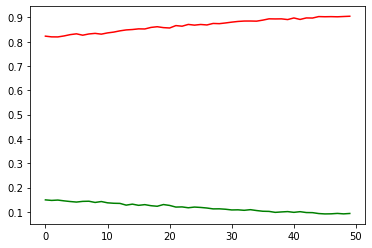

In [65]:
#Train
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['accuracy'],'r')
plt.show()

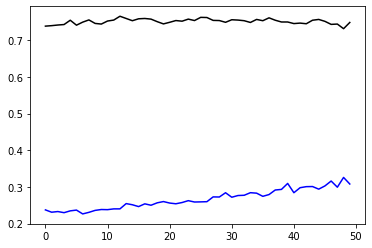

In [64]:
#Test
plt.figure(0)
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()